# ORIE 4580/5580/5581 Assignment 6

#### Students: S. Ulam (su001) and J. von Neuman (jvn001)

### Github link: [example Github link](https://github.com/SidBanerjee/ORIE4580-Simulation/blob/main/Notebooks/Unit0-Intro_Demos.ipynb)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Essential reading

The chapters on [Poisson Process](https://canvas.cornell.edu/courses/80773/modules/items/3269525), [DTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426077) and [CTMCs](https://canvas.cornell.edu/courses/80773/modules/items/3426086) from Mor Harchol-Balter, posted on Canvas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<hr><hr>

# Question 1 (The Spotify Shuffle)

**(a)** (10 pts) You have a Spotify playlist with $n$ songs playing on shuffle. Suppose Spotify truly picks a random song each time -- you want to see how many songs it takes on average to play **every song** on your playlist. Build a simulator to estimate this for a different values of $n$, and use this to try and guess the function.
	 
*Note 1*: We saw this in class as the `coupon collector' problem -- we also saw a way to compute the exact expected time in an earlier clicker question...

*Note 2*: Try and pick a large range of $n$ to get a sense of the function, and also make sure you always show your CIs!


<hr>

## Ans.

In [43]:
np.random.seed(123)
N = 1000
avg_num_songs = np.ones(N)
cis = np.ones((N, 2))
for n in range(2, N + 1):
    num_sims = 1000
    total_time = np.zeros(num_sims)
    for i in range(1, n + 1):
        prob = i / n
        total_time += np.random.geometric(p = prob, size = num_sims)
    avg_num_songs[n - 1] = total_time.mean()
    se = total_time.std(ddof=1) / np.sqrt(num_sims)
    ci_lower = avg_num_songs[n - 1] - 1.96 * se
    ci_upper = avg_num_songs[n - 1] + 1.96 * se
    cis[n - 1, 0] = ci_lower
    cis[n - 1, 1] = ci_upper

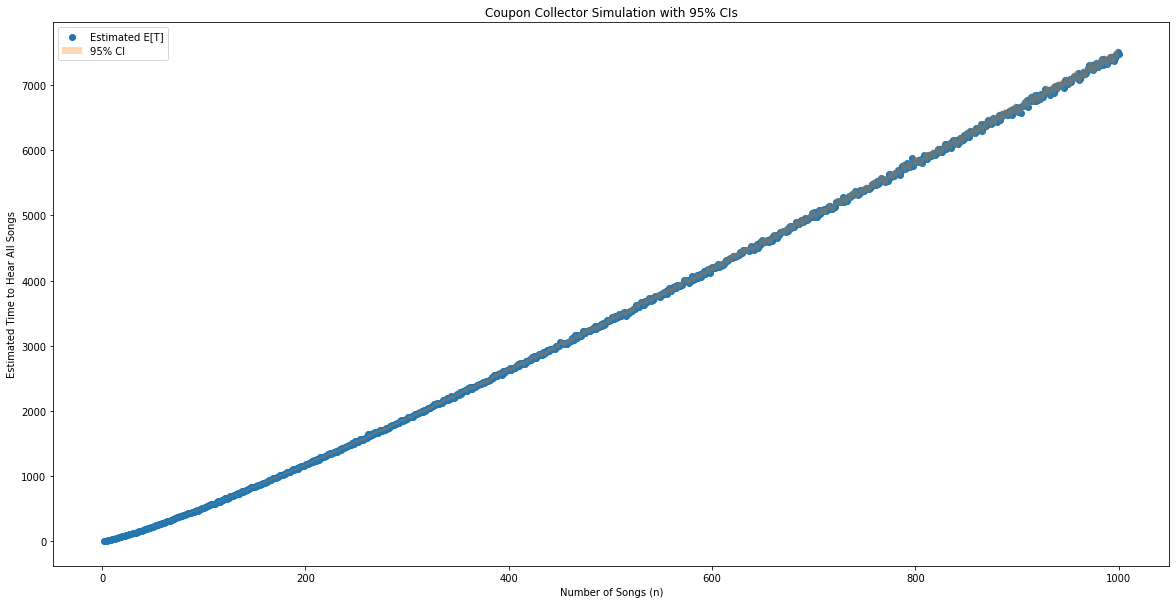

In [49]:
x = np.arange(2, N + 1)

plt.figure(figsize=(20, 10))

plt.scatter(x, avg_num_songs[1:], label="Estimated E[T]")

plt.fill_between(
    x,
    cis[1:, 0],
    cis[1:, 1],
    alpha=0.3,
    label="95% CI"
)

plt.xlabel("Number of Songs (n)")
plt.ylabel("Estimated Time to Hear All Songs")
plt.title("Coupon Collector Simulation with 95% CIs")
plt.legend()
plt.show()

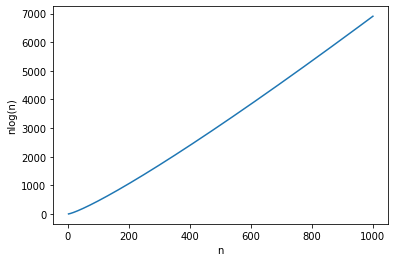

In [53]:
y = x * np.log(x)
plt.plot(x, y)
plt.xlabel('n')
plt.ylabel('nlog(n)')
plt.show()

On average, it takes approximately $n * log(n)$ plays to play every song in a playlist of $n$ songs.

<hr>

**(b)** (10 pts) Suppose Spotify uses the following poor randomizer: it labels songs as $\{0,1,2,\ldots,n-1\}$, and after playing a song $i$, it then either plays song $(i+1) mod(n)$ or $(i-1)mod(n)$ with probability $1/2$ (i.e., the next or previous song, imagining the songs to be in a ring with $n-1$ wrapping around to $1$). Simulate this randomizer for $n=20$, assuming you always start at song $1$, and find the histogram of the *last song to be played* for the first time using this shuffler.   


<hr>

## Ans.

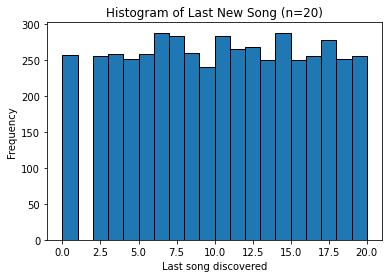

In [55]:
import numpy as np

def simulate_last_new_song(n=20):
    visited = np.zeros(n, dtype=bool)
    curr = 1 
    visited[curr] = True
    num_visited = 1

    last_new = curr

    while num_visited < n:
        if np.random.rand() < 0.5:
            curr = (curr + 1) % n
        else:
            curr = (curr - 1) % n

        if not visited[curr]:
            visited[curr] = True
            num_visited += 1
            last_new = curr

    return last_new

num_sims = 5000
last_songs = np.zeros(num_sims, dtype=int)

np.random.seed(0)
for k in range(num_sims):
    last_songs[k] = simulate_last_new_song(20)

plt.hist(last_songs, bins=np.arange(21), edgecolor='black')
plt.title("Histogram of Last New Song (n=20)")
plt.xlabel("Last song discovered")
plt.ylabel("Frequency")
plt.show()

<hr><hr>

# Question 2 (The Gambler's Ruin)


In class, we saw the balanced gambler's ruin problem: two gambler's $A$ and $B$ start with $\$a$ and $\$b$ initially, and play a sequence of games, where each game is won by either player with probability $1/2$, with the winner giving $\$ 1$ to the loser. Play goes on till one player runs out of money. 

<hr>

**(a)** (5 pts) We argued that when both players have the same initial budget, then each player is equally likely to win. We now want to run a simulation to find a similar formula for general initial budgets. To do so, assume the total budget is $a+b=20$, and run simulations to find the expected probability that $A$ wins for all values of $a$ from $\{0,1,\ldots,20\}$. Plot these, and use this to conjecture what the formula may be.


<hr>

## Ans.

In [58]:
np.random.seed(123)
outcomes = np.zeros(21)
outcomes[0] = 0
outcomes[20] = 1
num_sims = 5000
for a in range(1, 20):
    win_count = 0
    for i in range(num_sims):
        pos = a
        while pos != 0 and pos != 20:
            pos += np.random.choice([1, -1], p = [.5, .5])
            if pos == 20:
                win_count += 1
                break
    outcomes[a] = win_count / num_sims
outcomes

array([0.    , 0.0478, 0.0962, 0.153 , 0.2038, 0.2428, 0.303 , 0.3468,
       0.401 , 0.4492, 0.5026, 0.5424, 0.6052, 0.6486, 0.6982, 0.7482,
       0.8038, 0.8464, 0.8946, 0.953 , 1.    ])

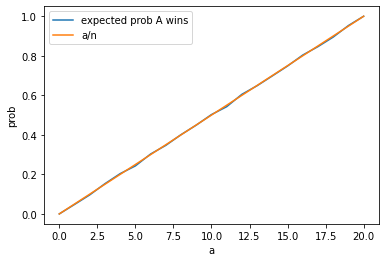

In [66]:
x = np.arange(0, 21)
plt.plot(x, outcomes, label='expected prob A wins')
plt.plot(x, x / 20, label='a/n')
plt.legend()
plt.xlabel('a')
plt.ylabel('prob')
plt.show()

If $a+b = n$, then the probability A wins, given that A starts with $a$ dollars, is $a/n$

**(b)** (10 pts) Another question we can ask is how long it takes for either player to get ruined. To study this, simulate the gambler's ruin for a range of values of $a$ and $b$, and use this to try and guess the expected time to ruin.
	
Note: Convince yourself that the function must be symmetric in $a$ and $b$, so you can assume $a\leq b$. Try plotting the expected absorption times for selected values of $a$, while varying $b$.


<hr>

## Ans.

In [68]:
np.random.seed(123)
a_vals = [1, 5, 10]         
b_vals = np.arange(1, 41)       
num_sims = 5000

time_to_ruin = np.zeros((len(a_vals), len(b_vals)))

for i, a in enumerate(a_vals):
    for j, b in enumerate(b_vals):
        
        if a > b:
            time_to_ruin[i, j] = np.nan
            continue
        
        total = a + b
        times = np.zeros(num_sims)
        
        for k in range(num_sims):
            pos = a
            count = 0
            while pos != 0 and pos != total:
                pos += np.random.choice([1, -1], p=[0.5, 0.5])
                count += 1
            times[k] = count
        
        time_to_ruin[i, j] = times.mean()

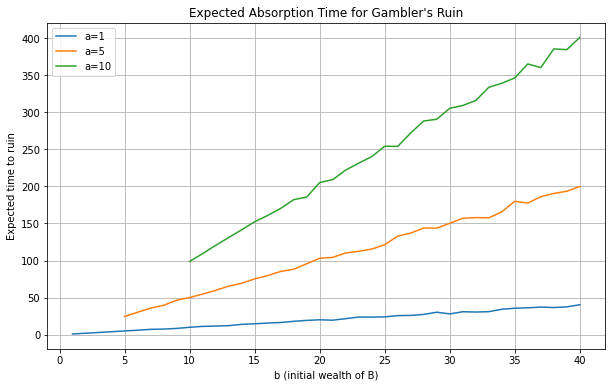

In [69]:
plt.figure(figsize=(10,6))

for idx, a in enumerate(a_vals):
    plt.plot(b_vals, time_to_ruin[idx], label=f"a={a}")

plt.xlabel("b (initial wealth of B)")
plt.ylabel("Expected time to ruin")
plt.title("Expected Absorption Time for Gambler's Ruin")
plt.legend()
plt.grid(True)
plt.show()

Expected Time to Ruin is $a * b$

<hr>

**(c)** (OPTIONAL) For parts $(a)$ and $(b)$, try and theoretically prove what you observe from your simulations!


<hr>

## Ans.

<hr><hr>

# Question 3 (Staffing a hospital)


Consider the model of the Fingerlakes Regional Hospital as shown below. New patients arrive at the reception at a rate of 20/hr and emergency patients enter the ER at a rate of 5/hr. The reception desk for non-emergency patients is managed by $n_R$ associates. Admission at the reception (not counting any queueing time) takes 5 minutes on average, regardless of whether the non-emergency patient is first-time or returning. The clinic is served by $d_C$ doctors with an average visit time of 15 minutes. About one in every four patients visiting the clinic are asked to return for a follow-up appointment that is, on average, 3 weeks (504 hours) later in time; another one-tenth of visitors to the clinic are referred to the internal ward (IW); the rest are treated and discharged. Patients arriving to the ER require about 1 hour of time with a doctor. The ER is staffed by $d_E$ doctors. Half of the patients in the ER are discharged after treatment, with the remainder referred to the IW. The average stay in the IW is about 72 hours and there are $n_I$ IW beds available. After a stay at the IW, 20\% of patients are discharged, whereas the rest are asked to return for a follow-up appointment as a non-emergency patient that is, on average, 3 weeks (504 hours) later in time. The reception, clinic, ER and IW all have their separate waiting areas and wait-lists, and serve patients on a FCFS basis.


**(a)** (5 pts)  Find bounds on the number of receptionists $n_R$, IW beds $N_I$, clinic doctors $d_C$ and ER doctors $d_E$ that the hospital requires to ensure it can keep up with its patient load?

<hr>

## Ans.


Reception and Emergency Room Arrival Rates:

$$
\lambda_R^{\text{ext}} = 20, \qquad \lambda_E = 5.
$$

Clinic receives all patients from Reception:

$$
\lambda_C = \lambda_R.
$$

IW receives:

$$
\lambda_I = 0.10 \lambda_C + 0.5 \lambda_E = 0.10 \lambda_R + 2.5.
$$

Reception receives all new patients and follow-ups:

$$
\lambda_R = 20 + 0.25\lambda_C + 0.8\lambda_I.
$$

Make Substituion to get:

$$
\lambda_R = 
20 + 0.25\lambda_R + 0.8(0.10\lambda_R + 2.5)
= 22 + 0.33\lambda_R.
$$

Solve:

$$
0.67 \lambda_R = 22 
\quad\Rightarrow\quad 
\lambda_R \approx 33.
$$

Thus:

$$
\lambda_C = \lambda_R \approx 33,\qquad
\lambda_I = 0.10(33) + 2.5 \approx 5.8.
$$

So the visit rates are:

$$
\lambda_R \approx 33,\quad
\lambda_C \approx 33,\quad
\lambda_E = 5,\quad
\lambda_I \approx 5.8.
$$

A station with arrival rate $\lambda$ and service capacity $\mu$ is stable if

$$
\rho = \frac{\lambda}{\mu} < 1.
$$

Reception Service time = $5$ min $(= \tfrac{1}{12})$ hr, so each receptionist has capacity $12$/hr.

$$
$12 n_R > \lambda_R \approx 33
\quad\Rightarrow\quad
n_R > \frac{33}{12} \approx 2.75.
$

So

$$
n_R \ge 3.
$$


Clinic Service time = 15 min \(= 0.25\) hr → each doctor serves 4/hr:

$$
4 d_C > \lambda_C \approx 33
\quad\Rightarrow\quad
d_C > \frac{33}{4} \approx 8.25.
$$

So

$$
d_C \ge 9.
$$

ER Service time = 1 hr so each ER doctor serves 1/hr:

$$
d_E > \lambda_E = 5.
$$

$$
d_E \ge 6.
$$


IW Mean stay = 72 hr so each bed serves $(1/72)$ patients/hr.

Total capacity = $\(N_I/72\)$.

Require:

$$
\frac{N_I}{72} > \lambda_I \approx 5.78
\quad\Rightarrow\quad
N_I > 72 \cdot 5.78 \approx 416.4.
$$

So

$$
N_I \ge 417.
$$


Thus,

$$
\boxed{
n_R \ge 3,\quad
d_C \ge 9,\quad
d_E \ge 6,\quad
N_I \ge 417.
}
$$


<hr>

**(b)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Approximate the average time spent in the clinic (including treatment but not including reception) and the average number of busy clinic doctors.

<hr>

## Ans.

From part (a): The arrival rate to the clinic is
$$
\lambda_C = \lambda_R \approx 33 \text{ patients/hr}.
$$

The clinic has $(d_C = 10)$ doctors, each with mean service time 15 minutes \(=0.25\) hr, so
$$
\mu_C = \frac{1}{0.25} = 4 \text{ patients/hr per doctor}.
$$

Thus the clinic can be modeled as a queue with
$$
\lambda = 33,\qquad \mu = 4,\qquad c = 10.
$$

The traffic intensity is
$$
\rho = \frac{\lambda}{c\mu} = \frac{33}{10 \cdot 4} \approx 0.825 < 1,
$$
so the clinic is stable.


For a queue, define
$$
a = \frac{\lambda}{\mu}.
$$

The normalizing constant is
$$
P_0 =
\left[
\sum_{n=0}^{c-1} \frac{a^n}{n!}
\;+\;
\frac{a^c}{c!(1-\rho)}
\right]^{-1}.
$$

Then the expected queue length is
$$
L_q
=
P_0 \cdot \frac{a^c \rho}{c!(1-\rho)^2},
$$
and the expected waiting time in queue is
$$
W_q = \frac{L_q}{\lambda}.
$$

The total time in the clinic (waiting + service) is
$$
W = W_q + \frac{1}{\mu}.
$$
Plugging in \(\lambda = 33\), \(\mu = 4\), \(c=10\), we obtain numerically
$$
L_q \approx 2.10,\qquad
W_q \approx 0.064 \text{ hr},\qquad
W \approx 0.314 \text{ hr}.
$$

So the average time spent in the clinic (including treatment but not reception) is
$$
\boxed{W \approx 0.314 \text{ hours } \approx 18.8 \text{ minutes}.}
$$

The average number of patients being served in the clinic is
$$
L_s = \frac{\lambda}{\mu} = \frac{32.84}{4} \approx 8.21.
$$

Since there are \(d_C = 10\) doctors, the average number of busy clinic doctors is
$$
\boxed{\bar{B}_C \approx 8.21}
$$
and the corresponding utilization per doctor is
$$
\boxed{\text{utilization per clinic doctor } \approx \rho \approx 0.821 \text{ (82.1\%)}}.
$$

<hr>

**(c)** (10 pts) Suppose the hospital chooses to run with $d_E=7$ doctors in the ER, $d_C=10$ doctors in the clinic, and $n=500$ beds in the IW. Compute the probability that the hospital will simultaneously have no patients in the ER and no patients in the clinic. 

<hr>

## Ans.

The ER receives arrivals at rate
$$
\lambda_E = 5 \text{ per hour},
$$
and each ER doctor has service rate
$$
\mu_E = 1 \text{ per hour}.
$$

Thus the ER is a queue with traffic intensity
$$
\rho_E = \frac{\lambda_E}{d_E \mu_E}
       = \frac{5}{7}
       \approx 0.714.
$$

The probability that the queue is empty is
$$
P_0 = \left[
\sum_{n=0}^{c-1} \frac{a^n}{n!}
\;+\;
\frac{a^c}{c!(1-\rho)}
\right]^{-1},
$$
where \(a = \lambda / \mu\) and \(\rho = a/c\).

For the ER,
$$
a_E = \frac{\lambda_E}{\mu_E} = 5,
\qquad
c_E = 7,
\qquad
\rho_E = \frac{5}{7}.
$$

Plugging into the formula gives
$$
P_0^{(ER)} \approx 0.103.
$$

From part (a), the effective arrival rate to the clinic is
$$
\lambda_C \approx 33 \text{ per hour}.
$$

Each clinic doctor has service rate
$$
\mu_C = \frac{1}{0.25} = 4 \text{ per hour},
$$
so the clinic is a queue with
$$
a_C = \frac{\lambda_C}{\mu_C} \approx \frac{33}{4} \approx 8.25,
\qquad
\rho_C = \frac{8.25}{10} \approx 0.825.
$$

Using the same formula,
$$
P_0^{(Clinic)} \approx 0.018.
$$

The probability that both are empty is

$$
P(\text{ER empty and Clinic empty})
\approx
P_0^{(ER)} \cdot P_0^{(Clinic)}
\approx
0.103 \times 0.018
\approx
0.00185.
$$

<hr>

**(d)** (40 pts) Build a simulator for the above model, assuming the external arrivals to the reception and ER are Poisson processes, and all service times are exponential and all routings are independent. You can re-use any of the code we provided in the recitations.
	
Use your simulator to study the following:
	
$(i)$ Plot the total number of patients waiting in the hospital when the number of doctors and beds is $1$ more than your suggestions in part $(a)$, and when it is $1$ less than your suggestions in part $(a)$. You should simulate over a long enough time horizon to be able to determine whether the numbers stabilize, or grow unbounded.
	
$(ii)$ Simulate the configuration in part $(b)$, and plot the average time spent by patients in the clinic, and the average number of busy clinic doctors. How do these compare to the answers in part $(b)$?

<hr>

## Ans.

In [5]:
# General class for the entities that move through the Queues
class Entity(object):
    
    starttime = 0
    
    # Initialize an Entity
    def __init__(self, start):
        self.starttime = start
        
    # Print an Entity (just arrival time)
    def __repr__(self):
        return str(self.starttime)

In [6]:
# General class for the queues themselves
class Queue(object):
    
    name = ""
    waitingentities = []
    
    # Initialize a Queue
    def __init__(self, name, waiting):
        self.name = name
        self.waitingentities = waiting
        
    # Print a Queue (just its name and the entire list of waiting Entities)
    def __repr__(self):
        return self.name + ": " + str(self.waitingentities)
    
    # A new Entity is created and arrives at this Queue
    def ArriveatQueue(self, time):
        newarrival = Entity(time)
        self.waitingentities.append(newarrival)
        
    # Exit the Queue (and the system)
    def LeaveQueue(self):
        newentities = []
        for e in range(1, np.size(self.waitingentities)):
            newentities.append(self.waitingentities[e])
        self.waitingentities = newentities
        
    #################Send the first Entity in line to another Queue ###########################
    def SendTo(self, destination):
        destination.waitingentities.append(self.waitingentities[1])
        newentities = [self.waitingentities[0]]
        for e in range(2, np.size(self.waitingentities)):
            newentities.append(self.waitingentities[e])
        self.waitingentities = newentities

In [70]:
nR = 3      # receptionists
dC = 10     # clinic doctors
dE = 7      # ER doctors
nI = 418     # IW beds

max_time = 10000
currenttime = 0

# Queues
reception = Queue("Reception", [])
clinic = Queue("Clinic", [])
er = Queue("ER", [])
iw = Queue("IW", [])

# Data Collection
times = []
reception_len = []
clinic_len = []
er_len = []
iw_len = []

total_in_system = []         
clinic_waits = []              
busy_clinic_doctors = []      


followups = []

# initial event times
next_reception_arrival = np.random.exponential(1/20)   
next_er_arrival = np.random.exponential(1/5) 

next_clinic_arrival = 1e6   
next_iw_arrival = 1e6  

# initial departure times
reception_departures = [1e6] * nR
clinic_departures = [1e6] * dC
er_departures = [1e6] * dE
iw_departures = [1e6] * nI

# Event Arrays
reception_events = np.array([next_reception_arrival] + reception_departures)
clinic_events = np.array([next_clinic_arrival] + clinic_departures)
er_events = np.array([next_er_arrival] + er_departures)
iw_events = np.array([next_iw_arrival] + iw_departures)

**Used ChatGPT to help debug my code**

## Part (i)

In [71]:
while currenttime < max_time:

    # Next event time at each station
    rec_next = np.min(reception_events)
    cli_next = np.min(clinic_events)
    er_next = np.min(er_events)
    iw_next = np.min(iw_events)

    # Next follow-up arrival time
    if len(followups) > 0:
        next_followup = min(followups)
    else:
        next_followup = 1e6

    # Global next event time
    global_next = min(rec_next, cli_next, er_next, iw_next, next_followup)

    # Reception Event
    if global_next == rec_next:
        currenttime = rec_next
        eventtype = int(np.argmin(reception_events))

        # Arrival to Reception
        if eventtype == 0:
            reception_events[0] += np.random.exponential(1/20)
            reception.ArriveatQueue(currenttime)
            for i in range(1, len(reception_events)):
                if reception_events[i] == 1e6:
                    reception_events[i] = currenttime + np.random.exponential(1/12)
                    break

        # Departure From Reception
        else:
            reception.LeaveQueue()
            clinic.ArriveatQueue(currenttime)
            for j in range(1, len(clinic_events)):
                if clinic_events[j] == 1e6:
                    clinic_events[j] = currenttime + np.random.exponential(0.25) 
                    break
            if len(reception.waitingentities) > 0:
                reception_events[eventtype] = currenttime + np.random.exponential(1/12)
            else:
                reception_events[eventtype] = 1e6

    # Clinic Event
    elif global_next == cli_next:
        currenttime = cli_next
        eventtype = int(np.argmin(clinic_events))
        
        if eventtype == 0:
            pass

        # Departure From Clinic
        
        else:

            if len(clinic.waitingentities) > 0:
                entered = clinic.waitingentities[0].starttime
                left = currenttime
                clinic_waits.append(left - entered)

                clinic.LeaveQueue()
            else:
                pass

            # Routing After Clinic
            u = np.random.rand()

            if u < 0.10:
                # to IW
                iw.ArriveatQueue(currenttime)
                for k in range(1, len(iw_events)):
                    if iw_events[k] == 1e6:
                        iw_events[k] = currenttime + np.random.exponential(72)
                        break

            elif u < 0.10 + 0.65:
                pass

            else:
                followups.append(currenttime + 504)

            # Schedule next clinic departure for this doctor
            if len(clinic.waitingentities) > 0:
                clinic_events[eventtype] = currenttime + np.random.exponential(0.25)
            else:
                clinic_events[eventtype] = 1e6

    # ER Event
    elif global_next == er_next:
        currenttime = er_next
        eventtype = int(np.argmin(er_events))

        # Arrival To ER
        if eventtype == 0:
            er_events[0] += np.random.exponential(1/5) 
            er.ArriveatQueue(currenttime)
            for d in range(1, len(er_events)):
                if er_events[d] == 1e6:
                    er_events[d] = currenttime + np.random.exponential(1)
                    break

        # Departure from ER
        else:
            er.LeaveQueue()
            u = np.random.rand()
            if u < 0.5:
                pass
            else:
                iw.ArriveatQueue(currenttime)
                for k in range(1, len(iw_events)):
                    if iw_events[k] == 1e6:
                        iw_events[k] = currenttime + np.random.exponential(72)
                        break
            if len(er.waitingentities) > 0:
                er_events[eventtype] = currenttime + np.random.exponential(1)
            else:
                er_events[eventtype] = 1e6

    # Internal Ward Event
    elif global_next == iw_next:
        currenttime = iw_next
        eventtype = int(np.argmin(iw_events))

        if eventtype == 0:
            pass

        # Departure From Internal Ward
        else:
            iw.LeaveQueue()
            u = np.random.rand()
            if u < 0.20:
                pass
            else:
                followups.append(currenttime + 504)
            if len(iw.waitingentities) > 0:
                iw_events[eventtype] = currenttime + np.random.exponential(72)
            else:
                iw_events[eventtype] = 1e6

    # Follow-up Arrival to Reception
    else:
        currenttime = next_followup
        followups.remove(next_followup)

        reception.ArriveatQueue(currenttime)
        # if receptionist idle, start service
        for i in range(1, len(reception_events)):
            if reception_events[i] == 1e6:
                reception_events[i] = currenttime + np.random.exponential(1/12)
                break

    # Data Collection
    times.append(currenttime)
    reception_len.append(len(reception.waitingentities))
    clinic_len.append(len(clinic.waitingentities))
    er_len.append(len(er.waitingentities))
    iw_len.append(len(iw.waitingentities))

    total_in_system.append(
        reception_len[-1] + clinic_len[-1] + er_len[-1] + iw_len[-1]
    )

    # number of busy clinic doctors
    busy_clinic = sum(1 for t in clinic_events[1:] if t < 1e6)
    busy_clinic_doctors.append(busy_clinic)

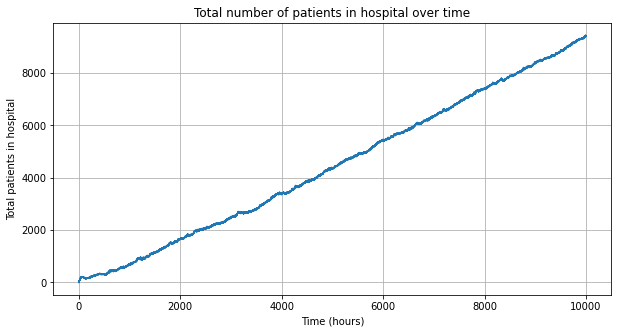

Average time in clinic (hours): 0.17829057006930515
Average number of busy clinic doctors: 9.47099946280873
Clinic doctor utilization: 0.9470999462808731


In [72]:
plt.figure(figsize=(10,5))
plt.plot(times, total_in_system)
plt.xlabel("Time (hours)")
plt.ylabel("Total patients in hospital")
plt.title("Total number of patients in hospital over time")
plt.grid(True)
plt.show()

avg_clinic_time = np.mean(clinic_waits) if len(clinic_waits) > 0 else np.nan
print("Average time in clinic (hours):", avg_clinic_time)

avg_busy_clinic = np.mean(busy_clinic_doctors)
print("Average number of busy clinic doctors:", avg_busy_clinic)
print("Clinic doctor utilization:", avg_busy_clinic / dC)

The Average time in clinic and the average number of busy clinic doctors is extremely close to the theoretical value I computed above. 

# Note about code below for part (ii). This code was not able to run in time. 

In [73]:
nR = 3      # receptionists
dC = 8     # clinic doctors
dE = 5      # ER doctors
nI = 416     # IW beds

max_time = 10000
currenttime = 0

# Queues
reception = Queue("Reception", [])
clinic = Queue("Clinic", [])
er = Queue("ER", [])
iw = Queue("IW", [])

# Data Collection
times = []
reception_len = []
clinic_len = []
er_len = []
iw_len = []

total_in_system = []         
clinic_waits = []              
busy_clinic_doctors = []      


followups = []

# initial event times
next_reception_arrival = np.random.exponential(1/20)   
next_er_arrival = np.random.exponential(1/5) 

next_clinic_arrival = 1e6   
next_iw_arrival = 1e6  

# initial departure times
reception_departures = [1e6] * nR
clinic_departures = [1e6] * dC
er_departures = [1e6] * dE
iw_departures = [1e6] * nI

# Event Arrays
reception_events = np.array([next_reception_arrival] + reception_departures)
clinic_events = np.array([next_clinic_arrival] + clinic_departures)
er_events = np.array([next_er_arrival] + er_departures)
iw_events = np.array([next_iw_arrival] + iw_departures)

In [74]:
while currenttime < max_time:

    # Next event time at each station
    rec_next = np.min(reception_events)
    cli_next = np.min(clinic_events)
    er_next = np.min(er_events)
    iw_next = np.min(iw_events)

    # Next follow-up arrival time
    if len(followups) > 0:
        next_followup = min(followups)
    else:
        next_followup = 1e6

    # Global next event time
    global_next = min(rec_next, cli_next, er_next, iw_next, next_followup)

    # Reception Event
    if global_next == rec_next:
        currenttime = rec_next
        eventtype = int(np.argmin(reception_events))

        # Arrival to Reception
        if eventtype == 0:
            reception_events[0] += np.random.exponential(1/20)
            reception.ArriveatQueue(currenttime)
            for i in range(1, len(reception_events)):
                if reception_events[i] == 1e6:
                    reception_events[i] = currenttime + np.random.exponential(1/12)
                    break

        # Departure From Reception
        else:
            reception.LeaveQueue()
            clinic.ArriveatQueue(currenttime)
            for j in range(1, len(clinic_events)):
                if clinic_events[j] == 1e6:
                    clinic_events[j] = currenttime + np.random.exponential(0.25) 
                    break
            if len(reception.waitingentities) > 0:
                reception_events[eventtype] = currenttime + np.random.exponential(1/12)
            else:
                reception_events[eventtype] = 1e6

    # Clinic Event
    elif global_next == cli_next:
        currenttime = cli_next
        eventtype = int(np.argmin(clinic_events))
        
        if eventtype == 0:
            pass

        # Departure From Clinic
        
        else:

            if len(clinic.waitingentities) > 0:
                entered = clinic.waitingentities[0].starttime
                left = currenttime
                clinic_waits.append(left - entered)

                clinic.LeaveQueue()
            else:
                pass

            # Routing After Clinic
            u = np.random.rand()

            if u < 0.10:
                # to IW
                iw.ArriveatQueue(currenttime)
                for k in range(1, len(iw_events)):
                    if iw_events[k] == 1e6:
                        iw_events[k] = currenttime + np.random.exponential(72)
                        break

            elif u < 0.10 + 0.65:
                pass

            else:
                followups.append(currenttime + 504)

            # Schedule next clinic departure for this doctor
            if len(clinic.waitingentities) > 0:
                clinic_events[eventtype] = currenttime + np.random.exponential(0.25)
            else:
                clinic_events[eventtype] = 1e6

    # ER Event
    elif global_next == er_next:
        currenttime = er_next
        eventtype = int(np.argmin(er_events))

        # Arrival To ER
        if eventtype == 0:
            er_events[0] += np.random.exponential(1/5) 
            er.ArriveatQueue(currenttime)
            for d in range(1, len(er_events)):
                if er_events[d] == 1e6:
                    er_events[d] = currenttime + np.random.exponential(1)
                    break

        # Departure from ER
        else:
            er.LeaveQueue()
            u = np.random.rand()
            if u < 0.5:
                pass
            else:
                iw.ArriveatQueue(currenttime)
                for k in range(1, len(iw_events)):
                    if iw_events[k] == 1e6:
                        iw_events[k] = currenttime + np.random.exponential(72)
                        break
            if len(er.waitingentities) > 0:
                er_events[eventtype] = currenttime + np.random.exponential(1)
            else:
                er_events[eventtype] = 1e6

    # Internal Ward Event
    elif global_next == iw_next:
        currenttime = iw_next
        eventtype = int(np.argmin(iw_events))

        if eventtype == 0:
            pass

        # Departure From Internal Ward
        else:
            iw.LeaveQueue()
            u = np.random.rand()
            if u < 0.20:
                pass
            else:
                followups.append(currenttime + 504)
            if len(iw.waitingentities) > 0:
                iw_events[eventtype] = currenttime + np.random.exponential(72)
            else:
                iw_events[eventtype] = 1e6

    # Follow-up Arrival to Reception
    else:
        currenttime = next_followup
        followups.remove(next_followup)

        reception.ArriveatQueue(currenttime)
        # if receptionist idle, start service
        for i in range(1, len(reception_events)):
            if reception_events[i] == 1e6:
                reception_events[i] = currenttime + np.random.exponential(1/12)
                break

    # Data Collection
    times.append(currenttime)
    reception_len.append(len(reception.waitingentities))
    clinic_len.append(len(clinic.waitingentities))
    er_len.append(len(er.waitingentities))
    iw_len.append(len(iw.waitingentities))

    total_in_system.append(
        reception_len[-1] + clinic_len[-1] + er_len[-1] + iw_len[-1]
    )

    # number of busy clinic doctors
    busy_clinic = sum(1 for t in clinic_events[1:] if t < 1e6)
    busy_clinic_doctors.append(busy_clinic)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(times, total_in_system)
plt.xlabel("Time (hours)")
plt.ylabel("Total patients in hospital")
plt.title("Total number of patients in hospital over time")
plt.grid(True)
plt.show()

# (ii) average time spent in clinic
avg_clinic_time = np.mean(clinic_waits) if len(clinic_waits) > 0 else np.nan
print("Average time in clinic (hours):", avg_clinic_time)

# (ii) average number of busy clinic doctors
avg_busy_clinic = np.mean(busy_clinic_doctors)
print("Average number of busy clinic doctors:", avg_busy_clinic)
print("Clinic doctor utilization:", avg_busy_clinic / dC)